# 3.0 Pre-Processing

---

# Contents

- [1.0 Daily Data](#1.0-Daily-Data)
    - [1.1 Load Data](#1.1-Load-Data)
    - [1.2 Check Stationarity](#1.2-Check-Stationarity)
    - [1.3 Auto Regression trends](#1.3-Auto-Regression-trends)
        - [1.3.1 ACF](#1.3.1-ACF)
        - [1.3.2 PACF](#1.3.2-PACF)
    - [1.4 Check Seasonality](#1.4-Check-Seasonality)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import calendar

from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import lag_plot

import plotly.graph_objects as go


In [2]:
pd.set_option('display.max_columns', None)

---

# 1.0 Daily Data

---

## 1.1 Load Data

In [3]:
daily_test = pd.read_csv('/Users/stuartdaw/Documents/Capstone_data/data/resampled/daily.csv', 
                      index_col='date', parse_dates=True)

In [4]:
daily_test.shape

(4921, 37)

In [5]:
daily_test.head()

,open,high,low,close,marubozu,marubozu+1,marubozu-1,marubozu-2,height,av_3_height,wk_mv_av,mnth_mv_av,qtr_mv_av,day-1_open,day-2_open,day-3_open,day-1_high,day-2_high,day-3_high,day-1_low,day-2_low,day-3_low,day-1_close,day-2_close,day-3_close,day+1_open,day+1_high,day+1_low,day+1_close,day+2_high,day+3_high,day+4_high,day+5_high,date+5,target,double_height,select
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-11-13,0.8637,0.8667,0.8560,0.8594,0,0.0,0.0,1.0,-0.0043,0.001400,0.862243,0.855607,0.901238,0.8668,0.8554,0.8616,0.8708,0.8679,0.8631,0.8591,0.8521,0.8522,0.8638,0.8669,0.8551,0.8593,0.8618,0.8549,0.8588,0.8634,0.8600,0.8579,0.8525,2000-11-20,0.8634,0.8551,0
2000-11-14,0.8593,0.8618,0.8549,0.8588,0,0.0,0.0,0.0,-0.0005,-0.002600,0.861214,0.854977,0.900643,0.8637,0.8668,0.8554,0.8667,0.8708,0.8679,0.8560,0.8591,0.8521,0.8594,0.8638,0.8669,0.8589,0.8634,0.8553,0.8578,0.8600,0.8579,0.8525,0.8536,2000-11-21,0.8634,0.8583,0
2000-11-15,0.8589,0.8634,0.8553,0.8578,0,-1.0,0.0,0.0,-0.0011,-0.001967,0.860514,0.854417,0.899977,0.8593,0.8637,0.8668,0.8618,0.8667,0.8708,0.8549,0.8560,0.8591,0.8588,0.8594,0.8638,0.8579,0.8600,0.8512,0.8529,0.8579,0.8525,0.8536,0.8486,2000-11-22,0.8600,0.8567,0
2000-11-16,0.8579,0.8600,0.8512,0.8529,-1,0.0,0.0,0.0,-0.0050,-0.002200,0.859243,0.853840,0.899322,0.8589,0.8593,0.8637,0.8634,0.8618,0.8667,0.8553,0.8549,0.8560,0.8578,0.8588,0.8594,0.8530,0.8579,0.8475,0.8501,0.8525,0.8536,0.8486,0.8456,2000-11-23,0.8579,0.8479,0
2000-11-17,0.8530,0.8579,0.8475,0.8501,0,0.0,-1.0,0.0,-0.0029,-0.003000,0.858529,0.853183,0.898537,0.8579,0.8589,0.8593,0.8600,0.8634,0.8618,0.8512,0.8553,0.8549,0.8529,0.8578,0.8588,0.8502,0.8525,0.8465,0.8515,0.8536,0.8486,0.8456,0.8454,2000-11-24,0.8536,0.8472,0


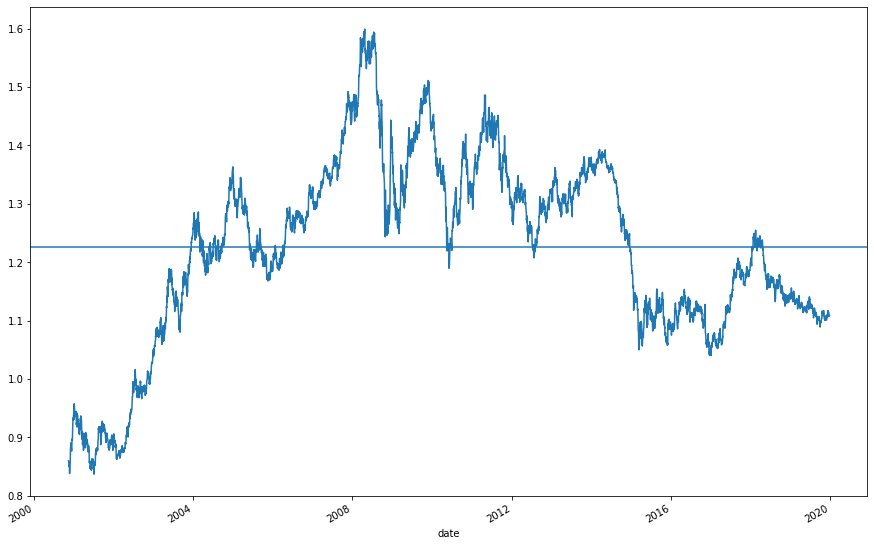

In [6]:
plt.figure(figsize=(15,10))
daily_test['close'].plot()
plt.axhline(y=daily_test['close'].mean());

In [7]:
daily_test.isnull().sum()

open             0
high             0
low              0
close            0
marubozu         0
marubozu+1       0
marubozu-1       0
marubozu-2       0
height           0
av_3_height      0
wk_mv_av         0
mnth_mv_av       0
qtr_mv_av        0
day-1_open       0
day-2_open       0
day-3_open       0
day-1_high       0
day-2_high       0
day-3_high       0
day-1_low        0
day-2_low        0
day-3_low        0
day-1_close      0
day-2_close      0
day-3_close      0
day+1_open       0
day+1_high       0
day+1_low        0
day+1_close      0
day+2_high       0
day+3_high       0
day+4_high       0
day+5_high       0
date+5           0
target           0
double_height    0
select           0
dtype: int64

In [8]:
# nulls because data not available for prior time frames

# 1.2 Check Stationarity

In [9]:
# Code written by Joseph Nelson.

def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

In [10]:
interpret_dftest(adfuller(daily_test['close']))

Test Statistic   -2.429535
p-value           0.133573
dtype: float64

### Observation

+ P-value shows that it is not under our 0.05 threshold so we cant reject the null hypothesis that the data is not stationary.

+ Therefore we need to difference

In [11]:
# Write a for loop to find the lowest difference value d, when it meets our criteria of belown 
# the 0.05 threshold we can reject out null hypothesis and the data can be considered stationary.

# Iterate through all possible differences.
for d in range(1, 10):
    
    # Keep track of the result of each difference
    print(f'Check difference of {d}.')
    print(f'p-value = {interpret_dftest(adfuller(daily_test["close"].diff(d).dropna()))["p-value"]}')
          
    # Print succesful 
    if interpret_dftest(adfuller(daily_test['close'].diff(d).dropna()))['p-value'] < 0.05:
        print(f'Need to difference the data by d={d} to have confirm its stationary')
        break
    
    print()

Check difference of 1.
p-value = 0.0
Need to difference the data by d=1 to have confirm its stationary


### Obsevation
+ Need to a difference of one to become a stationary dataset

---

## 1.3 Auto Regression trends

### 1.3.1 ACF

#### AR or Autoregression

+ This is where we see how much correlation the data has with itself.
+ The AR part of the model is used for looking at long term trends
+ I'll look at the Autocorrelation plot to see look for any significant correlation

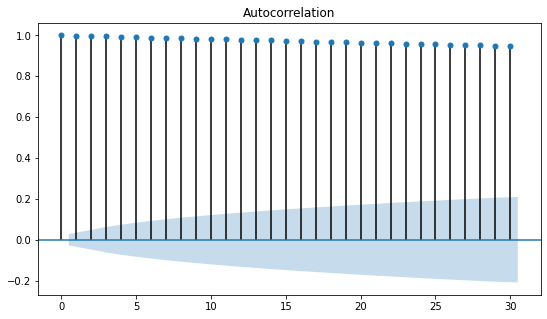

In [12]:
# Set figure/axes.
fig, ax = plt.subplots(figsize=(9,5))

# Generate plot.
plot_acf(daily_test["close"], lags=30, ax=ax);

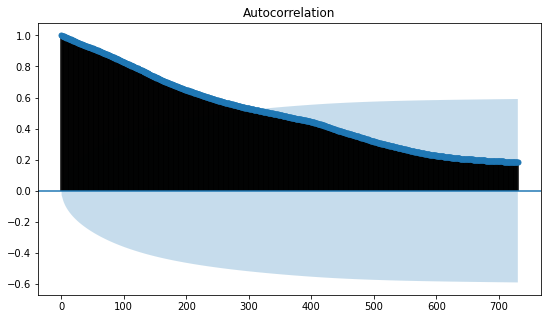

In [13]:
# Set figure/axes.
fig, ax = plt.subplots(figsize=(9,5))

# Generate plot.
plot_acf(daily_test["close"], lags=730, ax=ax);

#### Observation

+ The data is highly correlated
+ only after about 1 year does the data become uncorrelated.

---

### 1.3.2 PACF

#### Partial Autocorrelation Plot

+ I'll look at the Partial Autocorrelation plot
+ This takes into account the correlation already been accounted for in the previous time step

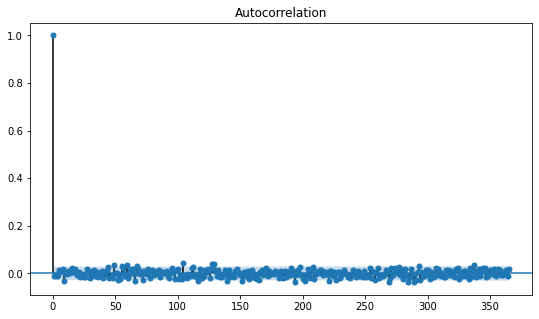

In [14]:
# Set figure/axes.
fig, ax = plt.subplots(figsize=(9,5))

# Generate plot.
plot_acf(daily_test["close"].diff(1).dropna(), lags=365, ax=ax);

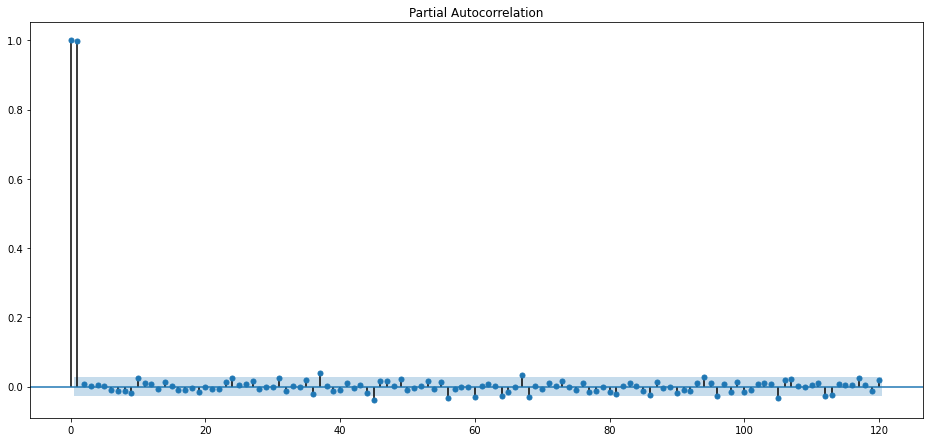

In [15]:
# 1 day  Autocorr and Partial Autocorr
fig = plt.figure(figsize=(16,16))
# ax1 = fig.add_subplot(211)
# fig = plot_acf(daily_test['close'], lags=120, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(daily_test['close'], lags=120, ax=ax2);


#### Observation

+ I would choose to have p as 1 in my model as there is sharp drop off and lag -1 has a positive value

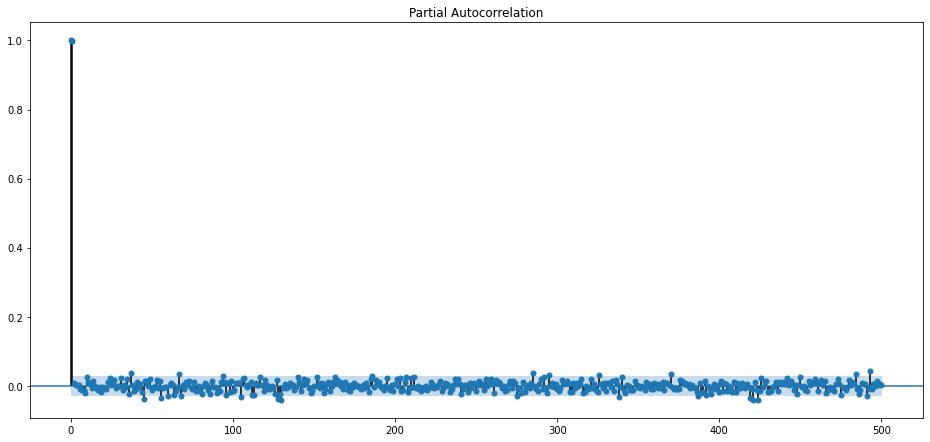

In [24]:
# 1 day  Autocorr and Partial Autocorr
fig = plt.figure(figsize=(16,16))
# ax1 = fig.add_subplot(211)
# fig = plot_acf(daily_test['close'], lags=120, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(daily_test['close'], lags=500, ax=ax2);


---

---

## 1.4 Check Seasonality

In [17]:
print(f'Autocorrelation between day price and 1-lag close proce: {round(daily_test["close"].autocorr(lag=1),4)}')
print(f'Autocorrelation between day price and 14-lag close price: {round(daily_test["close"].autocorr(lag=14),4)}')
print(f'Autocorrelation between day price and 30-lag close price: {round(daily_test["close"].autocorr(lag=30),4)}')
print(f'Autocorrelation between day price and 120-lag close price: {round(daily_test["close"].autocorr(lag=120),4)}')

Autocorrelation between day price and 1-lag close proce: 0.9988
Autocorrelation between day price and 14-lag close price: 0.9839
Autocorrelation between day price and 30-lag close price: 0.9639
Autocorrelation between day price and 120-lag close price: 0.842


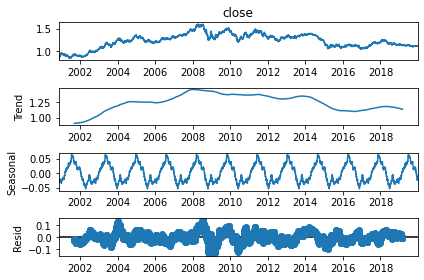

In [28]:
decomposition = seasonal_decompose(daily_test['close'], period=420)  
decomposition.plot();

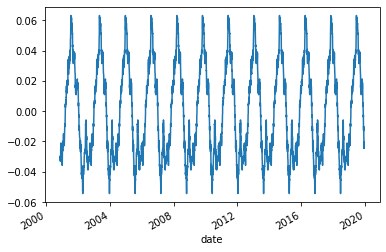

In [29]:
seasonal = decomposition.seasonal 
seasonal.plot()

In [20]:
# Define a Dickey-Fuller test.
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):

    # Determining rolling statistics:
    rolmean = timeseries.rolling(window=60, center=False).mean()
    rolstd = timeseries.rolling(window=60, center=False).std()

    # Plotting rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = timeseries.plot(color='blue',label='Original')
    mean = rolmean.plot(color='red', label='Rolling Mean')
    std = rolstd.plot(color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    # Performing a Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    print(dfoutput )

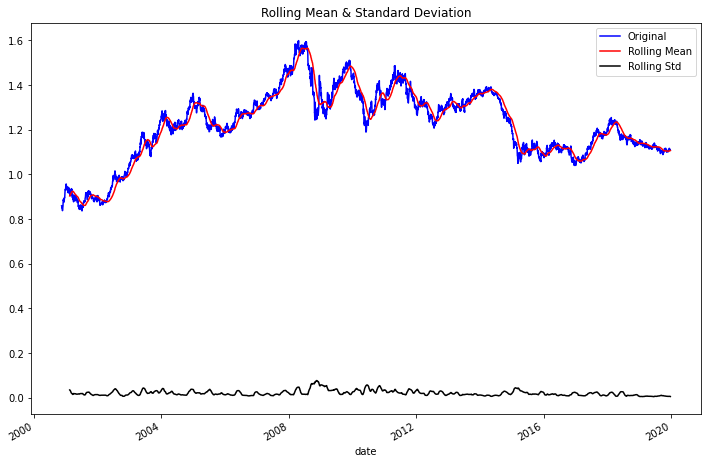

Results of Dickey-Fuller Test:
Test Statistic   -2.429535
p-value           0.133573
dtype: float64


In [21]:
# Perform the test.
test_stationarity(daily_test['close'])

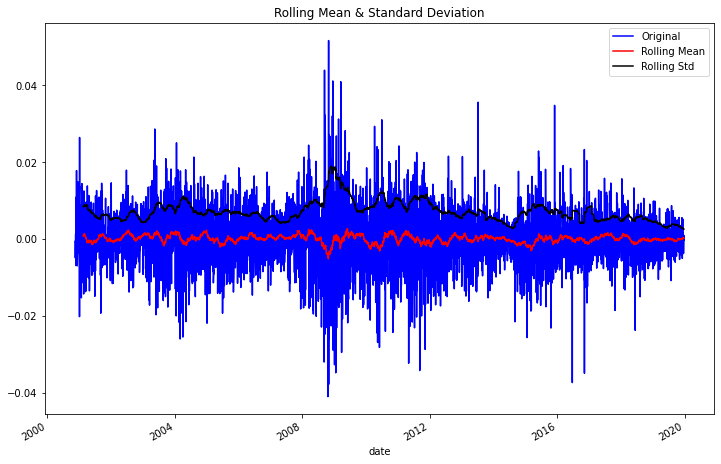

Results of Dickey-Fuller Test:
Test Statistic   -70.935096
p-value            0.000000
dtype: float64


In [22]:
# Seasonal difference:
daily_test['seasonal_difference'] = daily_test['close'].diff(1)  
test_stationarity(daily_test.seasonal_difference.dropna())

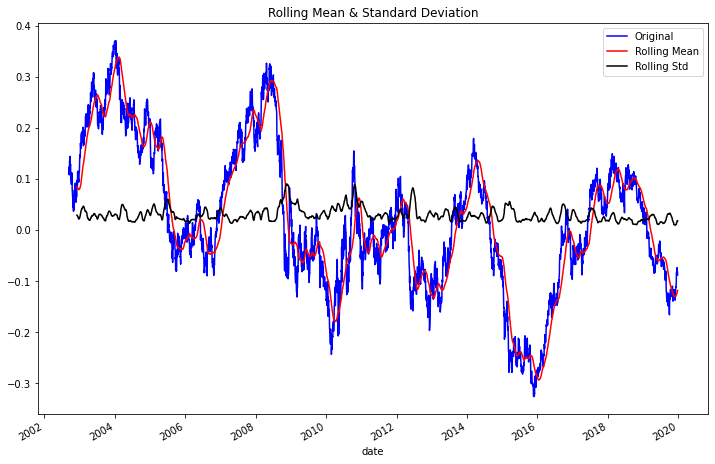

Results of Dickey-Fuller Test:
Test Statistic   -2.487070
p-value           0.118652
dtype: float64


In [23]:
# Seasonal difference:
daily_test['seasonal_difference'] = daily_test['close'].diff(422)  
test_stationarity(daily_test.seasonal_difference.dropna())

---

---